# Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv('heart attack.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#  find any missing data present or not

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

We dont have any NaN values in the dataset.

So lets move to data cleaning process.

We can divide the attributes in our dataset to 3 types:


Target variable : output

categorical features : sex, cp, fbs, restecg, exng, slp, caa, thall  (already converted to numeric)

numerical features : age, trtbps, chol, thalachh, oldpeak

# Dataset Cleaning

In [7]:
# Checking any duplicate rows present or not

df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
# one duplicate row in our dataset, so we need to drop it
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

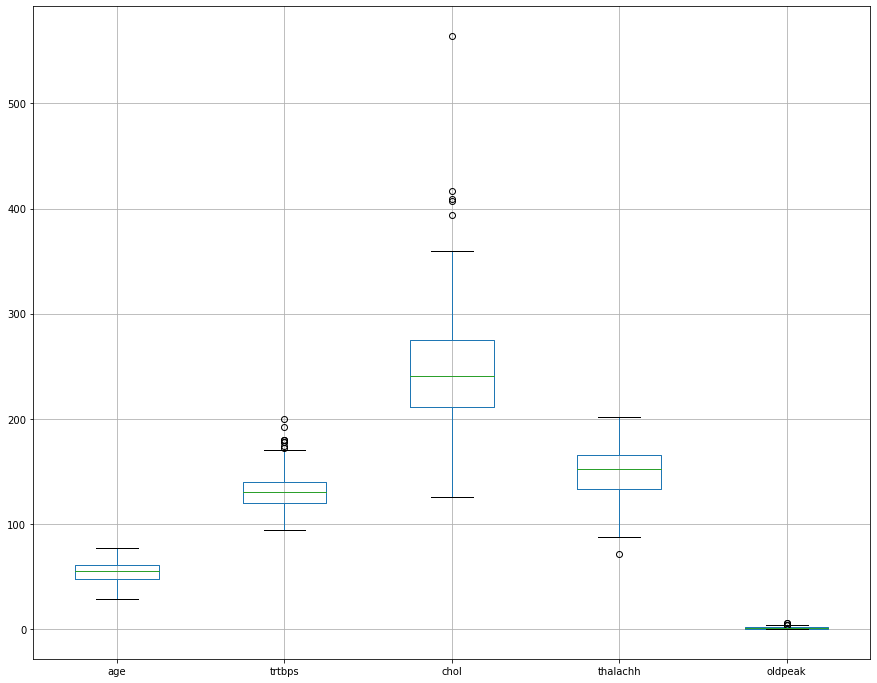

In [9]:
# Checking for the presence of outliers in numeric cols (age,thalachh,oldpeak)

plt.figure(figsize=(15,12))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']);

No outliers are present in age attribute but there are outliers in trtbps, chol, thalachh and oldpeak attributes. 
So we need to get the exact values of outliers using IQR method.

In [10]:
# finding number of outliers in each colm

def detect_outliers_iqr(data):
    outlier_list = []
    #data = sorted(data)
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in ['age','trtbps','chol','thalachh','oldpeak']:
    outliers = detect_outliers_iqr(df[i])
    print("Number of Outliers in",i,"attribute :", outliers)

Number of Outliers in age attribute : []
Number of Outliers in trtbps attribute : [172, 178, 180, 180, 200, 174, 192, 178, 180]
Number of Outliers in chol attribute : [417, 564, 394, 407, 409]
Number of Outliers in thalachh attribute : [71]
Number of Outliers in oldpeak attribute : [4.2, 6.2, 5.6, 4.2, 4.4]


No outliers in age attribute

Outliers in trtbps attribute : 172, 174, 178, 178, 180, 180, 180, 192, 200

Outliers in chol attribute : 394, 407, 409, 417, 564

Outliers in thalachh attribute : 71

Outliers in oldpeak attribute : 4.2, 4.2, 4.4, 5.6, 6.2



Now we need to handle these outlier using Quantile based flooring and capping method.

In [11]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['trtbps','chol','thalachh','oldpeak']:
    df[i]=handle_outliers(df[i])
    

#df_new

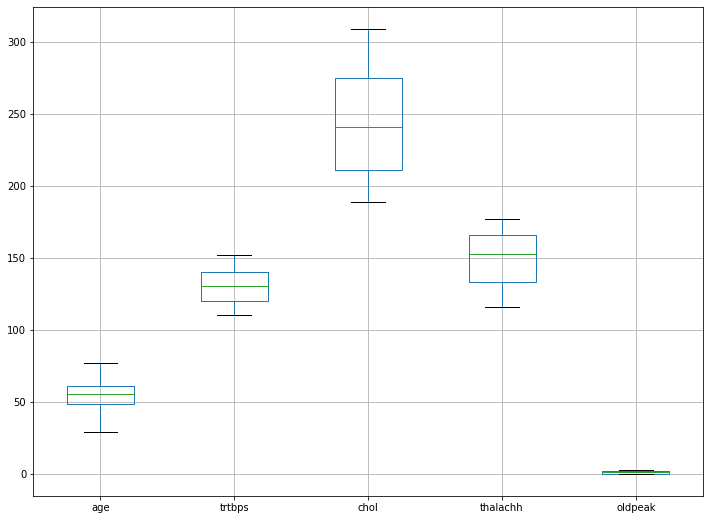

In [12]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
df.boxplot(column=['age','trtbps','chol','thalachh','oldpeak']);

In [13]:
# Checking for the presence of outliers in categoric cols
#sex, cp, fbs, restecg, exng, slp, caa, thall
print("Values in:\n sex :" ,df['sex'].unique(),'\n cp :',df['cp'].unique(),'\n fbs :',df['fbs'].unique(),
      '\n restecg :',df['restecg'].unique(),'\n exng :',df['exng'].unique(),
      '\n slp :',df['slp'].unique(),'\n caa :',df['caa'].unique(),'\n thall :',df['thall'].unique())


Values in:
 sex : [1 0] 
 cp : [3 2 1 0] 
 fbs : [1 0] 
 restecg : [0 1 2] 
 exng : [0 1] 
 slp : [0 2 1] 
 caa : [0 2 1 3 4] 
 thall : [1 2 3 0]


thall attribute is having value 0 which is not in described range.

So we can consider it as an outlier and will replace it with mode.

In [14]:
df[df['thall']==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128.0,216.0,0,0,116.0,0,0.0,2,0,0,1
281,52,1,0,128.0,204.0,1,1,156.0,1,1.0,1,0,0,0


Two rows are having thall=0

In [15]:
# replacing outlier in thall with mode

df['thall'].where(df['thall']!=0,df['thall'].mode()[0],inplace=True)


In [16]:
#verifying

df[df['thall']==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [17]:
df.iloc[48]

age          53.0
sex           0.0
cp            2.0
trtbps      128.0
chol        216.0
fbs           0.0
restecg       0.0
thalachh    116.0
exng          0.0
oldpeak       0.0
slp           2.0
caa           0.0
thall         2.0
output        1.0
Name: 48, dtype: float64

In [18]:
df.iloc[281]

age          59.0
sex           1.0
cp            2.0
trtbps      126.0
chol        218.0
fbs           1.0
restecg       1.0
thalachh    134.0
exng          0.0
oldpeak       2.2
slp           1.0
caa           1.0
thall         1.0
output        0.0
Name: 282, dtype: float64

# Visualisation

output
0    138
1    164
Name: output, dtype: int64


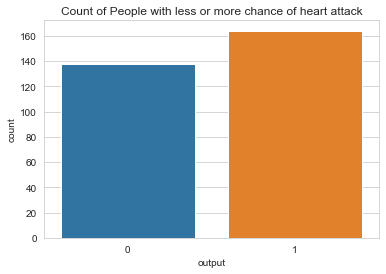

In [19]:
# visualization of the output (target varibale)

m=df.groupby(['output'])['output'].count()
print(m)

sns.set_style('whitegrid');
sns.countplot(x='output',data=df);
plt.title("Count of People with less or more chance of heart attack");

Number of people with more chance of heart attack: 164

Number of people with less chance of heart attack: 138


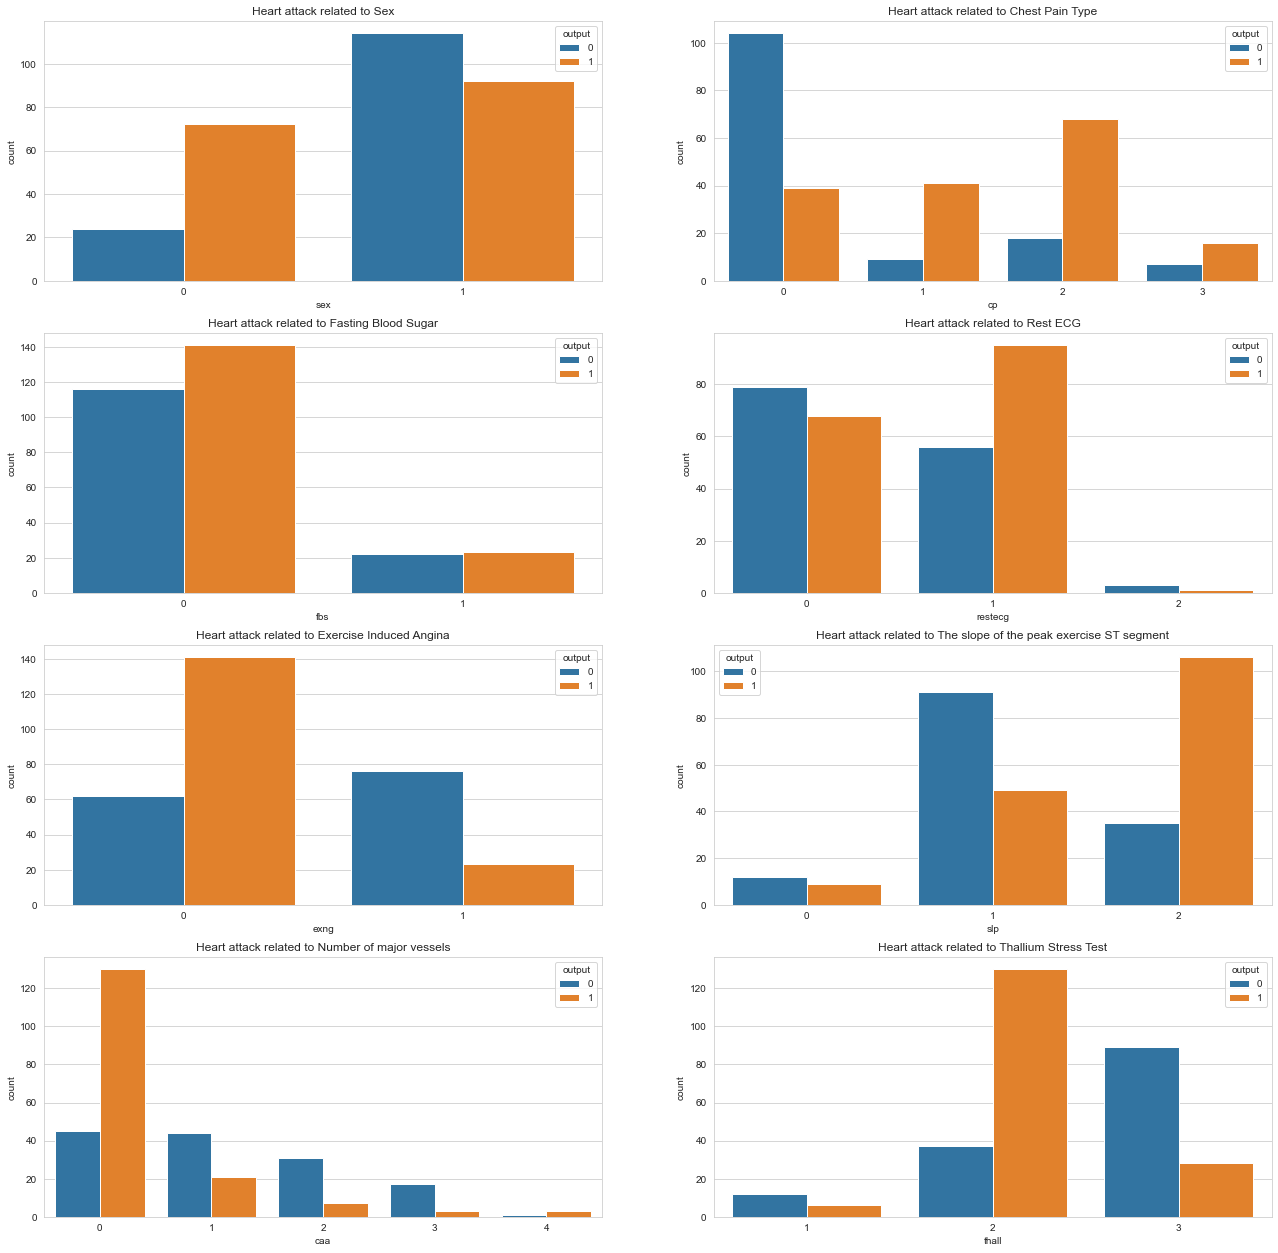

In [20]:
# Visualization of categorical attributes related to the target variable (output)

fig, ax = plt.subplots(4,2, figsize=(22,22));
sns.countplot(x='sex', data=df,hue='output', ax=ax[0][0]).set(title='Heart attack related to Sex');
sns.countplot(x='cp', data=df,hue='output', ax=ax[0][1]).set(title='Heart attack related to Chest Pain Type');
sns.countplot(x='fbs', data=df, hue='output',ax=ax[1][0]).set(title='Heart attack related to Fasting Blood Sugar');
sns.countplot(x='restecg', data=df,hue='output', ax=ax[1][1]).set(title='Heart attack related to Rest ECG');
sns.countplot(x='exng', data=df,hue='output', ax=ax[2][0]).set(title='Heart attack related to Exercise Induced Angina');
sns.countplot(x='slp', data=df,hue='output', ax=ax[2][1]).set(title='Heart attack related to The slope of the peak exercise ST segment');
sns.countplot(x='caa', data=df,hue='output', ax=ax[3][0]).set(title='Heart attack related to Number of major vessels');
sns.countplot(x='thall', data=df, hue='output',ax=ax[3][1]).set(title='Heart attack related to Thallium Stress Test');

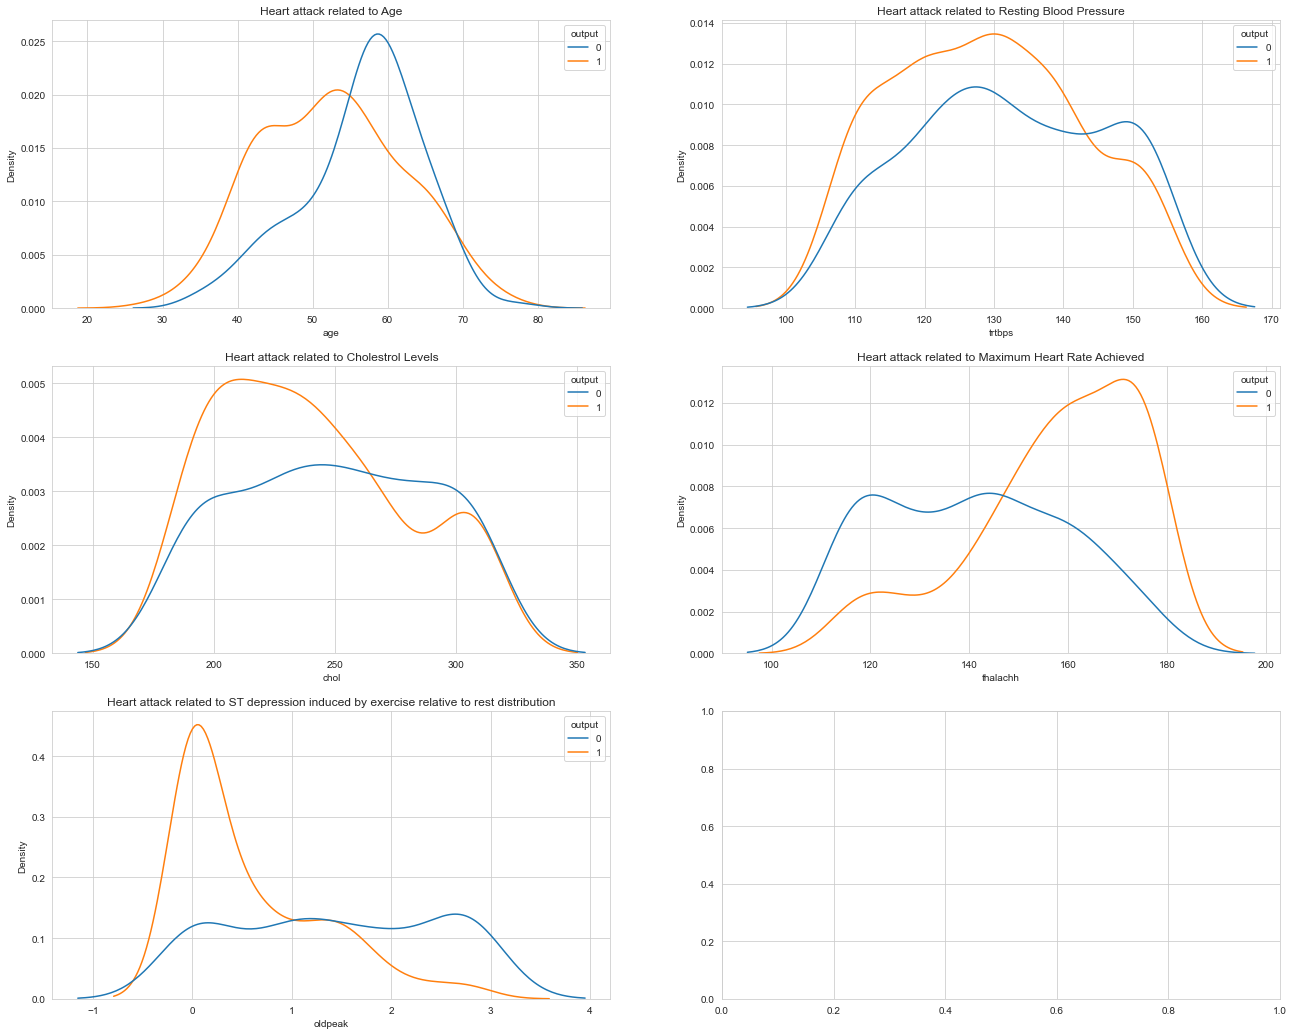

In [21]:
# Visualization of numerical attributes related to the target variable(output)

fig, ax = plt.subplots(3,2, figsize=(22,18));
sns.kdeplot(data=df,x="age", ax=ax[0][0], hue='output').set(title='Heart attack related to Age');
sns.kdeplot(data=df,x="trtbps", ax=ax[0][1], hue='output').set(title='Heart attack related to Resting Blood Pressure');
sns.kdeplot(data=df,x="chol", ax=ax[1][0], hue='output').set(title='Heart attack related to Cholestrol Levels');
sns.kdeplot(data=df,x="thalachh", ax=ax[1][1], hue='output').set(title='Heart attack related to Maximum Heart Rate Achieved');
sns.kdeplot(data=df,x="oldpeak", ax=ax[2][0], hue='output').set(title='Heart attack related to ST depression induced by exercise relative to rest distribution');

# Feature Selection

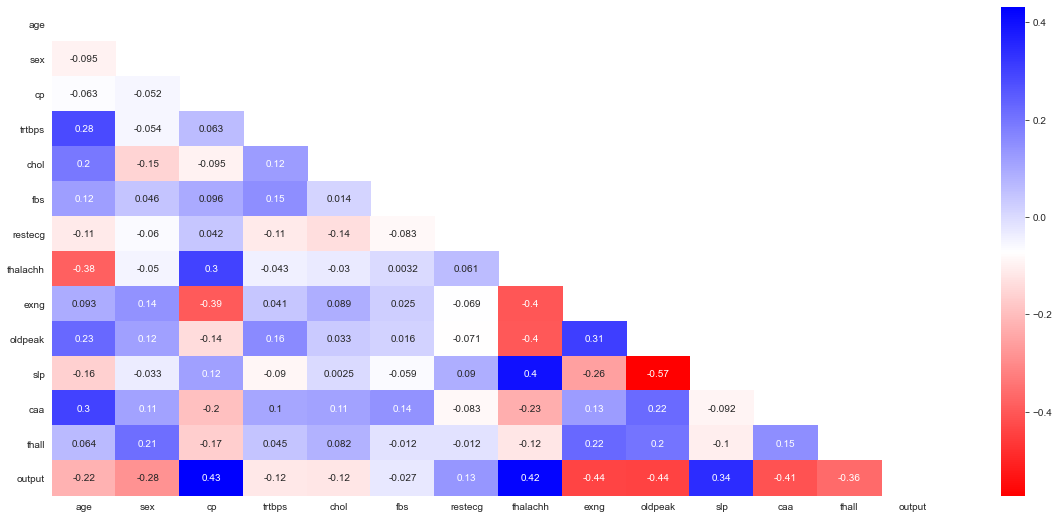

In [22]:
#Finding the correlation

matrix = np.triu(df.corr())
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),mask=matrix,annot=True,cmap='bwr_r');

# Feature Scaling


In [23]:
# numeric=['age','trtbps','chol','thalachh','oldpeak']

scale = StandardScaler()
#d=scale.fit_transform(df[['age','trtbps','chol','thalachh','oldpeak']])
df[['age','trtbps','chol','thalachh','oldpeak']]=scale.fit_transform(df[['age','trtbps','chol','thalachh','oldpeak']])
#d

In [24]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.949794,1,3,1.064668,-0.298585,1,0,0.000372,0,1.367483,0,0,1,1
1,-1.928548,1,2,-0.038476,0.135392,0,1,1.369395,0,1.880247,0,0,2,1
2,-1.485726,0,1,-0.038476,-1.038899,0,0,1.124197,0,0.444509,2,0,2,1
3,0.174856,1,1,-0.773906,-0.222001,0,1,1.369395,0,-0.170808,2,0,2,1
4,0.285561,0,0,-0.773906,1.638995,0,1,0.664450,1,-0.375914,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.285561,0,0,0.696954,-0.094361,0,1,-1.378867,1,-0.786125,1,0,3,0
299,-1.042904,1,3,-1.509335,0.492785,0,1,-0.919121,0,0.239403,1,0,3,0
300,1.503322,1,0,0.991125,-1.319708,1,1,-0.459374,0,1.880247,1,2,3,0
301,0.285561,1,0,-0.038476,-1.437137,0,1,-1.736448,1,0.239403,1,1,3,0


# Classification models

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn import svm # SVM
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB #Naive Byes
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#pip install xgboost
from xgboost import XGBClassifier #Extreme Gradient Boost

In [26]:
#split dataset in features and target variable

feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[feature_cols] # Features
y = df.output # Target variable

In [58]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) # 70% training and 30% test

In [59]:
# Decision Tree Algorithm

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.12087912087912


In [60]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 87.91208791208791


In [61]:
# SVM classifier

clf = svm.NuSVC() # Create SVM classifier

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 85.71428571428571


In [62]:
# KNN

clf = KNeighborsClassifier(n_neighbors=5)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 84.61538461538461


In [63]:
# Logistic Regression

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs') 

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 83.51648351648352


In [64]:
# Naive Byes

clf = GaussianNB() # Naive Byes

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 83.51648351648352


In [65]:
# Random Forest

clf=RandomForestClassifier(n_estimators=100)

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 83.51648351648352


In [66]:

# XGBoost

clf=XGBClassifier()

# Train the dataset
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

[10:21:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.71428571428571
